<a href="https://colab.research.google.com/github/Tien84/BitcoinPrediction/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

In [6]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-03,361.872986,417.899994,357.647003,403.416992,403.416992,206162000
1,2015-11-04,403.664001,495.562012,380.548004,411.562988,411.562988,263900000
2,2015-11-05,408.076996,447.561005,374.580994,386.354004,386.354004,151824992
3,2015-11-06,388.046997,395.835999,354.024994,374.470001,374.470001,122687000
4,2015-11-07,374.269012,390.585999,372.433014,386.481995,386.481995,56625100
...,...,...,...,...,...,...,...
2553,2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556
2554,2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815
2555,2022-11-01,20494.898438,20647.289063,20359.845703,20485.273438,20485.273438,39819303159
2556,2022-11-02,20482.958984,20742.810547,20087.134766,20159.503906,20159.503906,55552169483


In [9]:
data.head(), data.tail()

(         Date        Open        High         Low       Close   Adj Close  \
 0  2015-11-03  361.872986  417.899994  357.647003  403.416992  403.416992   
 1  2015-11-04  403.664001  495.562012  380.548004  411.562988  411.562988   
 2  2015-11-05  408.076996  447.561005  374.580994  386.354004  386.354004   
 3  2015-11-06  388.046997  395.835999  354.024994  374.470001  374.470001   
 4  2015-11-07  374.269012  390.585999  372.433014  386.481995  386.481995   
 
       Volume  
 0  206162000  
 1  263900000  
 2  151824992  
 3  122687000  
 4   56625100  ,
             Date          Open          High           Low         Close  \
 2553  2022-10-30  20817.982422  20917.005859  20547.462891  20635.603516   
 2554  2022-10-31  20633.695313  20795.320313  20287.458984  20495.773438   
 2555  2022-11-01  20494.898438  20647.289063  20359.845703  20485.273438   
 2556  2022-11-02  20482.958984  20742.810547  20087.134766  20159.503906   
 2557  2022-11-03  20158.783203  20335.416016  2

In [10]:
open_price = data.iloc[:,1:2]
#open_price = data.iloc[:,2:2]
train_set = open_price[:1791].values
test_set = open_price[1791:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1791, 1)
Test size: (767, 1)


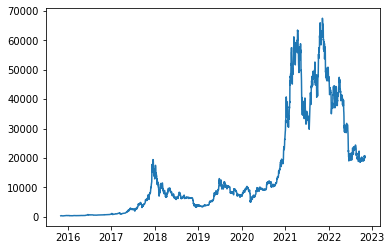

In [11]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price, fmt='-')
plt.savefig("BTC_hinh.png")

In [12]:
len(data)

2558

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [14]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [37]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,30,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = x_train.reshape(-1,1)

#train_set_scaled = scaler.fit_transform(train_set)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

#x_train = scaler.fit_transform(x_train)
#y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,30)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)


In [38]:
from sklearn.preprocessing import MinMaxScaler
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [39]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 20 doan 1
n_input = 20
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [40]:
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [42]:
history=model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/DataSet/lstm_test')

Epoch 1/50


45/48 [===========================>..] - ETA: 0s - loss: 0.0589

48/48 [==============================] - 6s 26ms/step - loss: 0.0575 - val_loss: 0.0350
Epoch 2/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0152
Epoch 3/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.0035
Epoch 4/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 2.9411e-04
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 7.9539e-04
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 7/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 8/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 7.2636e-04
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 2.1833e-05
Epoch 10/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 2.6503e-04
Epoch 11/

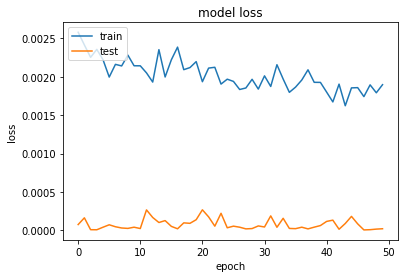

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

24/24 [==============================] - 1s 2ms/step


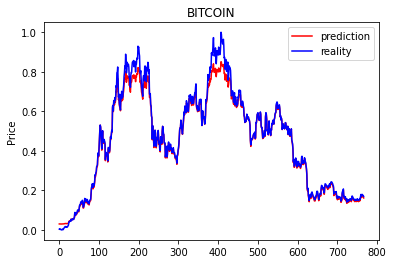

In [32]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/DataSet/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:2558], color='r')
plt.plot(test_2[:2558] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [33]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[0.03019206]
 [0.03008682]
 [0.03032729]
 [0.03022954]
 [0.02998994]
 [0.02994175]
 [0.02992301]
 [0.0300511 ]
 [0.03023165]
 [0.02997218]
 [0.03004338]
 [0.03049637]
 [0.03076068]
 [0.03151588]
 [0.03188592]
 [0.03248471]
 [0.03202555]
 [0.03201616]
 [0.03230856]
 [0.03161566]
 [0.03174542]
 [0.03227869]
 [0.03333591]
 [0.03432997]
 [0.04245993]
 [0.0446638 ]
 [0.04413675]
 [0.04648474]
 [0.0454503 ]
 [0.04603098]
 [0.05466628]
 [0.04892065]
 [0.0514206 ]
 [0.05305094]
 [0.05656768]
 [0.0559084 ]
 [0.05310972]
 [0.05910894]
 [0.06185536]
 [0.08481437]
 [0.08459201]
 [0.07282185]
 [0.08320639]
 [0.08084085]
 [0.08017486]
 [0.08676579]
 [0.09615657]
 [0.0968612 ]
 [0.09264905]
 [0.09084467]
 [0.1031213 ]
 [0.11939528]
 [0.12207872]
 [0.12230225]
 [0.13586709]
 [0.13621907]
 [0.13163495]
 [0.13155065]
 [0.14398587]
 [0.13769288]
 [0.11107264]
 [0.11037745]
 [0.12065455]
 [0.12840262]
 [0.15285568]
 [0.13890198]
 [0.14568901]
 [0.1497289 ]
 [0.13716382]
 [0.14482099]
 [0.14798927]
 [0.14

In [34]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

26/26 [==============================] - 1s 2ms/step - loss: 9.2804e-04
Test Score 0.0009280438534915447


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

24/24 [==============================] - 0s 2ms/step
RMSE: 0.030464


In [36]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_set))/np.abs(test_set))
print('MAPE: ' + str(mape))

MAPE: 0.9999888942324857
